# **Tansfer Learning Inception V3**

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Cotton_Disease/data/train'
valid_path = '/content/drive/MyDrive/Cotton_Disease/data/val'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Cotton_Disease/data/train/*')

In [8]:
folders

['/content/drive/MyDrive/Cotton_Disease/data/train/fresh cotton leaf',
 '/content/drive/MyDrive/Cotton_Disease/data/train/diseased cotton plant',
 '/content/drive/MyDrive/Cotton_Disease/data/train/fresh cotton plant',
 '/content/drive/MyDrive/Cotton_Disease/data/train/diseased cotton leaf']

In [9]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton_Disease/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')



Found 1951 images belonging to 4 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cotton_Disease/data/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 1274s 21s/step - loss: 3.4011 - accuracy: 0.7109 - val_loss: 1.1301 - val_accuracy: 0.8272
Epoch 2/20
61/61 [==============================] - 239s 4s/step - loss: 0.7487 - accuracy: 0.8775 - val_loss: 0.4087 - val_accuracy: 0.9198
Epoch 3/20
61/61 [==============================] - 238s 4s/step - loss: 0.5122 - accuracy: 0.9159 - val_loss: 0.6631 - val_accuracy: 0.8981
Epoch 4/20
61/61 [==============================] - 238s 4s/step - loss: 0.5881 - accuracy: 0.8965 - val_loss: 0.3538 - val_accuracy: 0.9321
Epoch 5/20
61/61 [==============================] - 239s 4s/step - loss: 0.4681 - accuracy: 0.9195 - val_loss: 0.9883 - val_accuracy: 0.8704
Epoch 6/20
61/61 [==============================] - 240s 4s/step - loss: 0.4335 - accuracy: 0.9282 - val_loss: 0.8269 - val_accuracy: 0.8796
Epoch 7/20
61/61 [==============================] - 240s 4s/step - loss: 0.4940 - accuracy: 0.9298 - val_loss: 0.6610 - val_accuracy: 0.9136
Epoch 8/20


In [19]:
import matplotlib.pyplot as plt

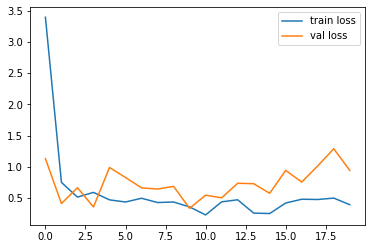

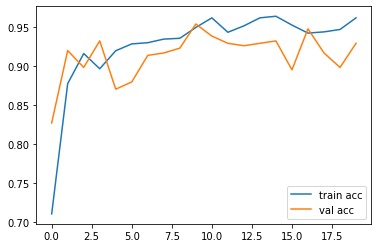

<Figure size 432x288 with 0 Axes>

In [20]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [22]:
y_pred = model.predict(test_set)

In [23]:
y_pred

array([[1.10603378e-17, 2.91611218e-06, 1.72469060e-17, 9.99997139e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.44669249e-23],
       [9.99993801e-01, 8.98661368e-10, 4.75941301e-16, 6.15778345e-06],
       ...,
       [1.01714726e-08, 1.78394409e-23, 1.00000000e+00, 0.00000000e+00],
       [2.84134760e-04, 3.07825916e-02, 1.66244352e-08, 9.68933225e-01],
       [1.35455489e-18, 1.82067907e-36, 1.00000000e+00, 1.10361654e-34]],
      dtype=float32)

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)    

In [25]:
y_pred

array([3, 1, 0, 3, 1, 2, 0, 3, 1, 1, 3, 3, 2, 1, 0, 3, 1, 2, 3, 1, 3, 2,
       2, 2, 2, 1, 1, 2, 3, 3, 2, 3, 1, 3, 3, 1, 0, 3, 3, 0, 2, 0, 2, 1,
       1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 3, 1, 1, 1, 2, 1, 2, 3, 1, 2,
       0, 1, 3, 1, 0, 2, 1, 3, 1, 2, 3, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 3,
       3, 1, 3, 2, 3, 3, 1, 3, 1, 1, 0, 0, 2, 3, 2, 2, 2, 3, 2, 2, 0, 0,
       2, 1, 3, 2, 3, 0, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 3, 2, 1, 3, 1,
       1, 3, 2, 3, 0, 1, 1, 3, 1, 0, 3, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1,
       3, 1, 1, 1, 1, 2, 0, 2, 3, 0, 0, 0, 0, 3, 1, 1, 2, 3, 0, 2, 1, 3,
       0, 3, 0, 1, 3, 1, 2, 2, 2, 1, 1, 2, 3, 0, 0, 1, 0, 3, 1, 2, 3, 2,
       2, 2, 2, 3, 3, 3, 0, 1, 1, 0, 0, 3, 0, 0, 1, 0, 3, 1, 1, 1, 0, 1,
       1, 1, 2, 1, 1, 3, 0, 0, 3, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 0, 3, 0, 0, 1, 3, 1, 1, 2, 1, 1, 3, 1, 2, 2, 3, 3, 2, 3, 0, 3,
       1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 1, 0, 3, 2, 1, 0, 1, 3, 1, 1,
       2, 1, 1, 3, 3, 1, 3, 3, 1, 1, 0, 2, 3, 0, 3,